Data Loading & Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("retail_sales.csv")

df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Cleaning

In [2]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check missing values
df.isnull().sum()

# Check duplicates
df.duplicated().sum()


np.int64(0)

Descriptive Statistics

In [3]:
df.describe()


,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [4]:
df['Total Amount'].mean()
df['Total Amount'].median()
df['Total Amount'].std()


559.997631555123

Time Series Analysis (Sales Trend)

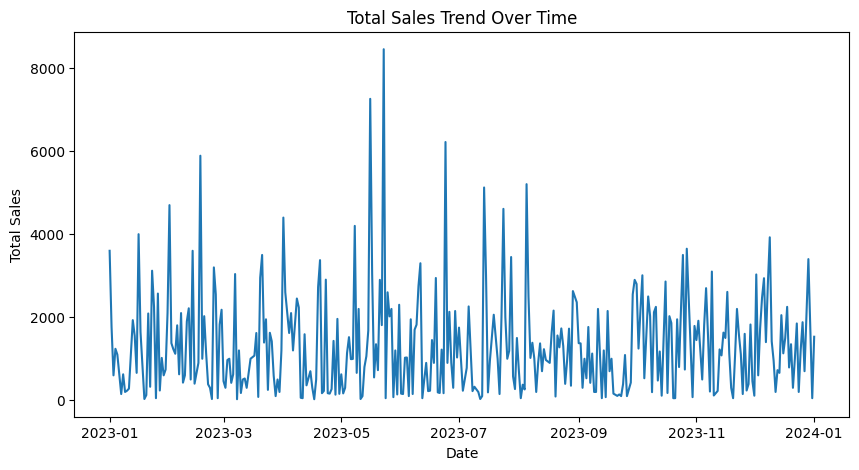

In [5]:
daily_sales = df.groupby('Date')['Total Amount'].sum()

plt.figure(figsize=(10,5))
plt.plot(daily_sales)
plt.title("Total Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


Customer & Product Analysis

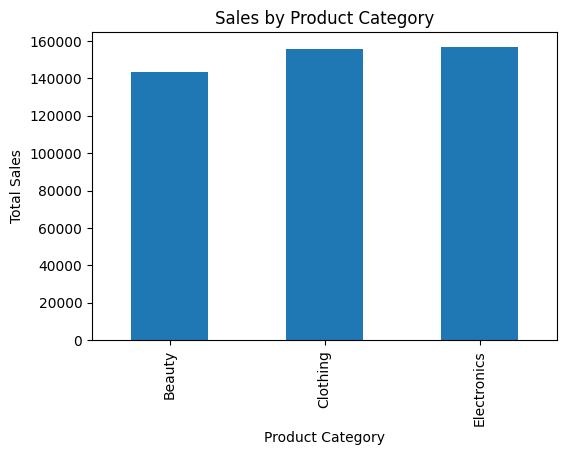

In [6]:
category_sales = df.groupby('Product Category')['Total Amount'].sum()

category_sales.plot(kind='bar', figsize=(6,4))
plt.title("Sales by Product Category")
plt.ylabel("Total Sales")
plt.show()


Gender-based Analysis

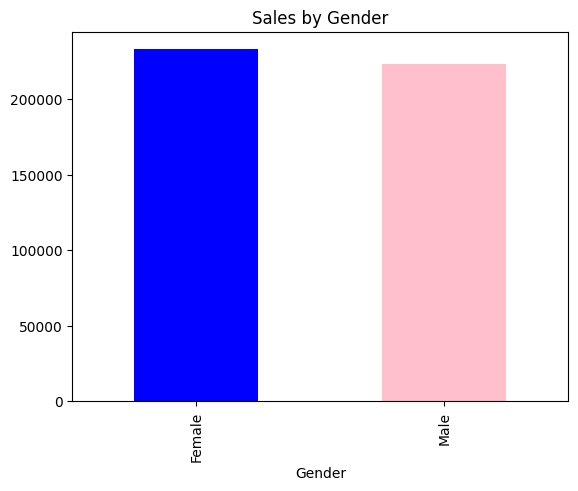

In [7]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()

gender_sales.plot(kind='bar', color=['blue','pink'])
plt.title("Sales by Gender")
plt.show()


Age Distribution

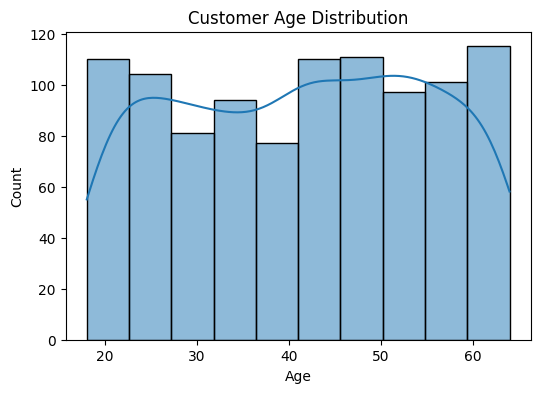

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title("Customer Age Distribution")
plt.show()


Visualization (Heatmap)

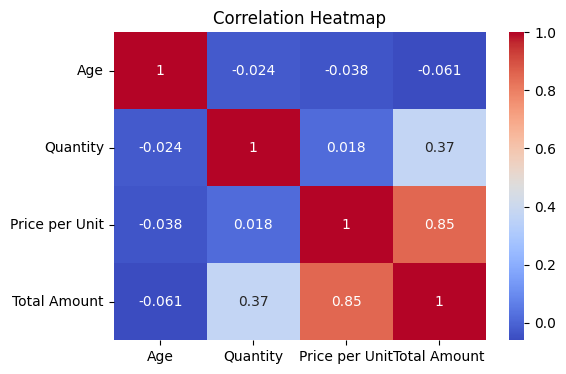

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Age','Quantity','Price per Unit','Total Amount']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
